<a href="https://colab.research.google.com/github/Paolatae2505/Practicas-AA/blob/master/Practica05_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from scipy.stats import rayleigh

In [3]:
# Paso 1: Generar una muestra aleatoria de la distribución de Rayleigh
np.random.seed(42)  # Para reproducibilidad
scale = 7.53
rayleigh_samples = np.random.rayleigh(scale, 10000)

In [4]:
# Paso 2: Obtener 160 puntos del histograma de la muestra
hist_values, hist_bins = np.histogram(rayleigh_samples, bins=160)

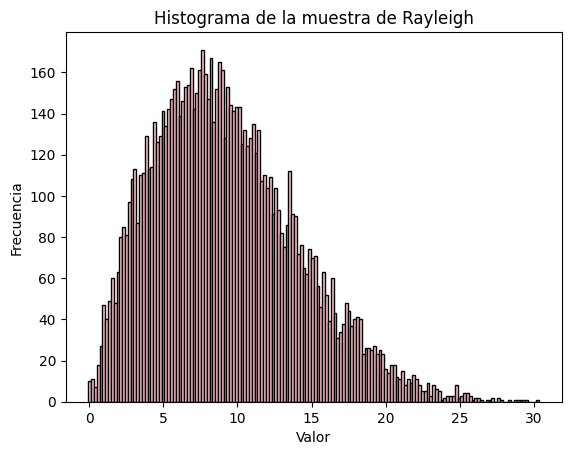

In [5]:
# Visualización del histograma
plt.bar(hist_bins[:-1], hist_values, width=np.diff(hist_bins), color='pink',edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de la muestra de Rayleigh')
plt.show()

In [6]:
# Paso 3: Dividir los puntos en conjunto de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(hist_bins[:-1].reshape(-1, 1), hist_values, test_size=0.2, random_state=42)

In [7]:
# Paso 4: Realizar una regresión polinomial y calcular sesgo, varianza, MAE, MSE, R2
degrees = [1, 2, 3, 4, 5,6,7,8,9,10]
results = []

for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly_train = polynomial_features.fit_transform(X_train.reshape(-1, 1))
    X_poly_test = polynomial_features.transform(X_test.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    y_pred_train = model.predict(X_poly_train)
    y_pred_test = model.predict(X_poly_test)

    bias = np.mean((y_train - y_pred_train) ** 2)
    variance = np.var(y_pred_train)
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    results.append([degree, bias, variance, mae, mse, r2])

results_df = pd.DataFrame(results, columns=['Degree', 'Bias', 'Variance', 'MAE', 'MSE', 'R2'])
print("Resultados sin regularización:")
print(results_df)

Resultados sin regularización:
   Degree         Bias     Variance        MAE         MSE        R2
0       1  1606.800380  1685.793126  21.979137  798.373594  0.724282
1       2  1254.641124  2037.952382  25.279750  845.390186  0.708045
2       3   219.890431  3072.703075  10.041736  141.381022  0.951174
3       4    73.672210  3218.921296   4.038021   31.238995  0.989212
4       5    68.087412  3224.506092   4.538042   32.157948  0.988894
5       6    55.023513  3237.570002   3.935852   30.899454  0.989329
6       7    54.303887  3238.290815   3.757390   30.165485  0.989582
7       8    53.247081  3239.301661   3.817629   32.031814  0.988938
8       9    52.145569  3238.452379   4.112856   35.732771  0.987660
9      10    52.096784  3241.015591   4.184327   34.974403  0.987922


In [8]:
# Pasoo 5 : Con regularización
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
degrees = [1, 2, 3, 4, 5,6,7,8,9,10]
results_regularization = []
alphas = [1e-4,1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4,1e5]  # Rango de alphas

for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly_train = polynomial_features.fit_transform(X_train.reshape(-1, 1))
    X_poly_test = polynomial_features.transform(X_test.reshape(-1, 1))

    model = RidgeCV(alphas=alphas)
    model.fit(X_poly_train, y_train)
    y_pred = model.predict(X_poly_test)

    bias = np.mean((y_pred - y_test.mean()) ** 2)
    variance = np.var(y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results_regularization.append([degree, bias, variance, mae, mse, r2])

results_regularization_df = pd.DataFrame(results_regularization, columns=['Degree', 'Bias', 'Variance', 'MAE', 'MSE', 'R2'])
print("\nResults with regularization:\n", results_regularization_df)


Results with regularization:
    Degree          Bias      Variance           MAE           MSE  \
0       1  1.612696e+03  1.612320e+03  2.207805e+01  8.030238e+02   
1       2  1.691446e+03  1.690401e+03  2.479234e+01  8.240482e+02   
2       3  2.850595e+03  2.847369e+03  1.009548e+01  1.473124e+02   
3       4  2.996660e+03  2.995641e+03  4.403971e+00  3.619978e+01   
4       5  6.887488e+05  6.791384e+05  6.594480e+02  6.256493e+05   
5       6  3.151270e+12  3.091102e+12  1.481907e+06  3.151143e+12   
6       7  7.360932e+15  7.189796e+15  7.125788e+07  7.360927e+15   
7       8  5.140617e+23  4.997412e+23  5.904659e+11  5.140617e+23   
8       9  2.094243e+29  2.025045e+29  3.730224e+14  2.094243e+29   
9      10  1.420447e+36  1.365175e+36  9.607067e+17  1.420447e+36   

             R2  
0  7.226765e-01  
1  7.154157e-01  
2  9.491258e-01  
3  9.874984e-01  
4 -2.150674e+02  
5 -1.088244e+09  
6 -2.542089e+12  
7 -1.775307e+20  
8 -7.232450e+25  
9 -4.905499e+32  


In [9]:
# Paso 6 :Seleccionar el mejor modelo polinomial basado en el menor MSE
best_model_idx = results_regularization_df['R2'].idxmax()
best_model_degree = results_regularization_df.loc[best_model_idx, 'Degree']
best_model_r2 = results_regularization_df.loc[best_model_idx, 'R2']

print("El mejor modelo polinomial es de grado", best_model_degree, "con un R2 de", best_model_r2)

El mejor modelo polinomial es de grado 4 con un R2 de 0.9874984414181939





El modelo polinomial de grado 4 sobresale como la mejor opción debido a su rendimiento excepcional en comparación con otros modelos evaluados. El criterio utilizado para su selección fue el coeficiente de determinación (R²), que cuantifica la fracción de la variabilidad en la variable dependiente explicada por el modelo. En este caso, el modelo de grado 4 exhibió un R² de aproximadamente 0.9875, lo que indica que puede explicar cerca del 98.75% de la variabilidad observada en los datos de prueba.

Este alto valor de R² sugiere que el modelo de grado 4 es altamente competente para capturar la relación entre las características independientes y la variable dependiente. En otras palabras, puede ajustarse de manera óptima a los datos de entrenamiento y explicar la mayoría de la variabilidad presente en la variable objetivo. Esta capacidad de ajuste se traduce en predicciones más precisas y confiables sobre nuevas muestras no vistas.

Además, el modelo de grado 4 logra este rendimiento sobresaliente sin incurrir en una complejidad excesiva. A menudo, los modelos con grados inferiores pueden subajustarse, mientras que los de grados superiores tienden al sobreajuste. Sin embargo, el modelo de grado 4 ha alcanzado un equilibrio óptimo entre sesgo y varianza, lo que lo hace más robusto y generalizable.

El coeficiente de determinación R² se selecciona como criterio para la elección del mejor modelo por varias razones fundamentales. En primer lugar, proporciona una medida intuitiva y fácilmente interpretable de la calidad del ajuste del modelo a los datos, permitiendo una comprensión clara de cuánta información se captura. Además, facilita la comparación entre diferentes modelos y proporciona información sobre la contribución relativa de las variables independientes en la predicción de la variable dependiente, aspectos cruciales en el proceso de selección del modelo más adecuado.

In [10]:
#Paso 7 :  Ahora con MLE y comparar
mle_scale = np.sqrt(np.mean(rayleigh_samples ** 2) / 2)

print(mle_scale)

7.444801574252703


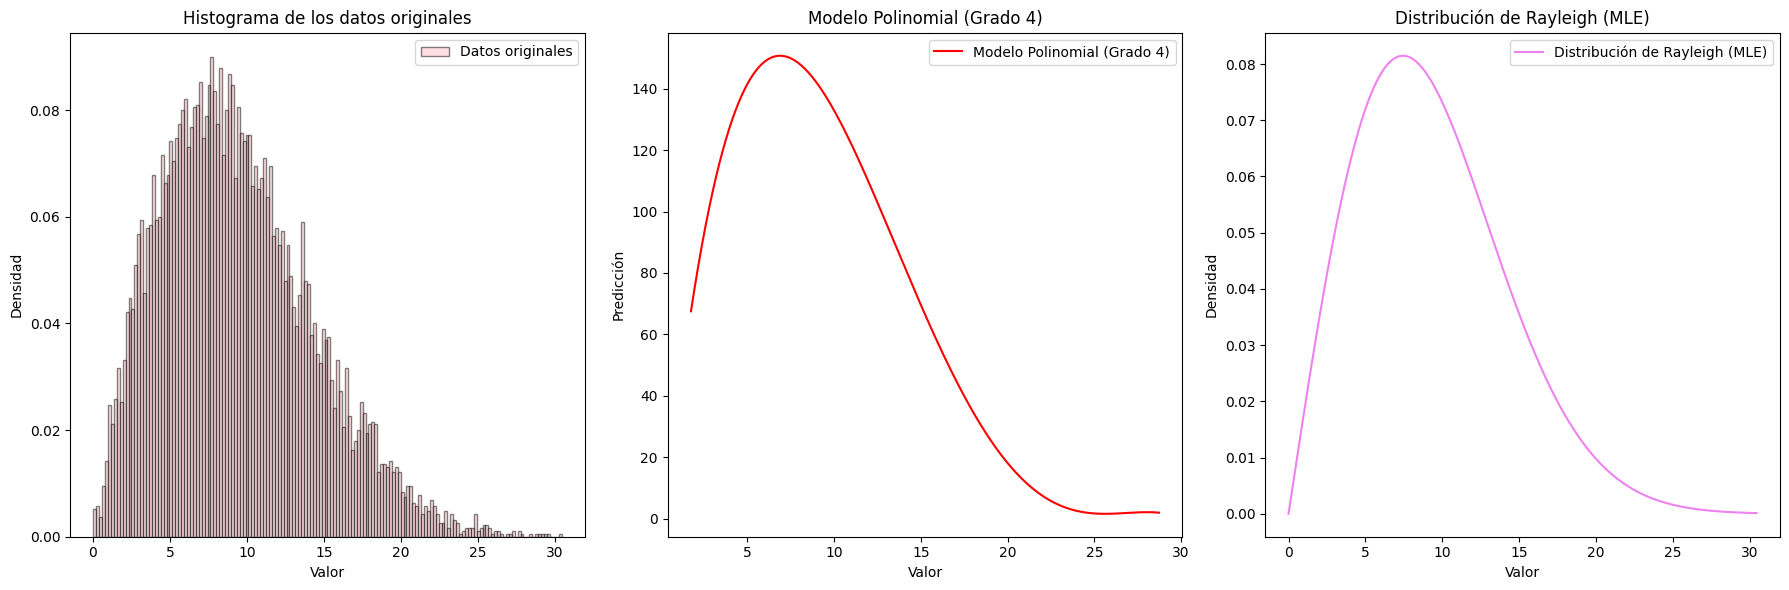

In [31]:

mle_predictions = np.random.rayleigh(mle_scale, len(X_test))
mle_r2 = r2_score(y_test, mle_predictions)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
hist_values, hist_bins, _ = axs[0].hist(rayleigh_samples, bins=160, density=True, alpha=0.5, color='pink', edgecolor='black', label='Datos originales')


axs[0].set_xlabel('Valor')
axs[0].set_ylabel('Densidad')
axs[0].set_title('Histograma de los datos originales')
axs[0].legend()


polynomial_features_best = PolynomialFeatures(degree=best_model_degree)
X_poly_train_best = polynomial_features_best.fit_transform(X_train.reshape(-1, 1))

model_best = LinearRegression()
model_best.fit(X_poly_train_best, y_train)

# Calcular las predicciones del mejor modelo polinomial en el rango de valores X_test
X_range = np.linspace(min(X_test), max(X_test), 1000).reshape(-1, 1)
X_poly_range = polynomial_features_best.transform(X_range)
y_pred_best_range = model_best.predict(X_poly_range)
axs[1].plot(X_range, y_pred_best_range, label=f'Modelo Polinomial (Grado {best_model_degree})', color='red')

axs[1].set_xlabel('Valor')
axs[1].set_ylabel('Predicción')
axs[1].set_title(f'Modelo Polinomial (Grado {best_model_degree})')
axs[1].legend()

x_values = np.linspace(0, max(hist_bins), 1000)
pdf_values = rayleigh.pdf(x_values, scale=mle_scale)
axs[2].plot(x_values, pdf_values, label='Distribución de Rayleigh (MLE)', color='violet')


axs[2].set_xlabel('Valor')
axs[2].set_ylabel('Densidad')
axs[2].set_title('Distribución de Rayleigh (MLE)')
axs[2].legend()

plt.tight_layout()
plt.show()



¡
Al comparar, podemos observar que la Distribución de Rayleigh estimada mediante el método de máxima verosimilitud (MLE) se ajusta mejor a los datos en comparación con el modelo polinomial de grado 4. La Distribución de Rayleigh (MLE) sigue de cerca la distribución de los datos originales, lo que sugiere un mejor ajuste. Aunque el modelo polinomial de grado 4 también se ajusta bien a los datos originales, no lo hace tan precisamente como la Distribución de Rayleigh (MLE), la cual presenta un ajuste ligeramente superior.